<img src="img/ims_logo.png" alt="Drawing" style="width: 130px;" align="left"/>

<div style="text-align: right">
<br>
<br>
<p style="font-size:16px;text-align: right"><b>Data Science and Machine Learning: Group 2</b></p> <br>
<b>Authors:</b> Ana Filipa Silva - N20190866 ; André Estrela Pires - N20191411;<br> Hugo Virgilio Severino - N20190968; Tiago Paixao Domingues - N20190413
</div>

<br>

# 1st Project - Segmentation - The Lagoste Stores

## Introduction

The LaGoste Stores is a well-established company operating in the fashion, sports and luxury sector. Presently they have around **300,000 registered customers** and serve more than 1.000.000 consumers a year. They sell products from **5 major categories**: <ins>Sneakers, Rackets, T-Shirts, Watches and Hats</ins>. These five categories can be also be divided into Premium Brand material and more mainstream articles. The Customers can order and acquire those products through **3 channel groups**: <ins>Physical stores, quarterly catalogues and the companies’ website</ins>. Globally, the company had stable revenues and a healthy bottom line in the past five years, but the profit growth perspectives for the next two years are fickle. A few strategic initiatives are being considered to invert the situation. One of those is a Marketing efficiency program to improve marketing activities with a particular focus on boosting the efficiency of the marketing campaigns tremendously.

In this report, we have our calculations and conclusions for the first project of the **Data Science and Machine Learning course**. The objective here is to identify actionable segments within Lagoste Stores’s Customer base to use in the second project for the elaboration of new marketing campaigns. <br> We adapted the Cross-Industry Standard Process for Data Mining (**CRISP-DM**) methodology to the reality of this first project to present a comprehensive and interpretable data analysis of the Lagoste Stores dataset. We used different quantitative techniques to explore and preprocess the data. Therefore our report for this first delivery is divided as follows:
    1. Business and Data Understanding
    2. Data Preprocessing
        2.1 Import and Explore
        2.2 Verify Data Quality and Coherence
        2.3 Data Cleaning
        2.4 Data Transformations
        2.5 Data Visualization
        2.6 Dealing with Outliers
    3. Modelling
        3.1 Product Usage Segmentation
        3.2 Customer Value Segmentation
    4. Conclusions

## 1. Business and Data Understanding

Despite having a healthy bottom line in the past five years, the Lagoste's profit growth perspectives for the next two years are fickle. The primary **business objective** is to improve Lagoste's sales by boosting marketing campaigns efficiency. Our job is to increase their knowledge of different costumer and product segments. Accordingly, our **data mining goal** is to identify various data segments within Lagoste Stores's database, given the available data. These segments can be identified by looking at the available data and through the usage of different clustering techniques. We decided to apply the **k-means** model to our dataset considering two distinct visions:
     1. Customer Value segmentation
     2. Product Usage segmentation

## 2. Data Preprocessing
This section shows the steps we made in the preprocessing of our data. We are going to start by **importing and exploring** our dataset. Then we will **verify the data quality and coherence**, as well as describe all **data cleaning** steps performed to deal with missing values and outliers. We are also going to pursue some necessary **data transformations** to our dataset. Finally, we will make an intuitive **data visualization** assessment to shed further light into the next modelling phase.

### 2.1 Import and Explore

In this section we will import the Lagoste Store's dataset and explore basic characteristics of the data so that we are able to make the best decisions in the data cleaning and transformation steps.

__Step 1:__ Import libraries and load our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

lagoste = pd.read_excel(r'data/Group02_LaGoste_Campaign.xlsx',index_col='Custid',parse_dates=True)

__Step 2:__ Explore our dataset

In [2]:
print(lagoste.columns)
print(lagoste.shape)
print(lagoste.describe())
print(lagoste.describe(include=["O"]))

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntSneakers', 'MntTShirts',
       'MntRackets', 'MntWatches', 'MntHats', 'MntPremium_Brand',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain', 'DepVar'],
      dtype='object')
(2500, 26)
        Year_Birth         Income     Kidhome     Teenhome      Recency  \
count  2500.000000    2471.000000  2500.00000  2500.000000  2500.000000   
mean   1971.762400   63494.125860     0.43920     0.496000    49.118000   
std      12.178459   28702.802728     0.52992     0.543785    28.835531   
min    1944.000000    1134.000000     0.00000     0.000000     0.000000   
25%    1962.000000   41758.000000     0.00000     0.000000    24.000000   
50%    1973.000000   62618.000000     0.00000     0.000000    49.000

### 2.2 Verify Data Quality and Coherence

In this section we are going to assess data quality and check overall coherence. Also, we will identify missing values and outliers.

__Step 1:__ Check data coherence

In [3]:
# Check overall data coherence
print(lagoste.iloc[0:,0:10].describe(include='all'))
print(lagoste.iloc[0:,10:20].describe(include='all'))
print(lagoste.iloc[0:,20::].describe(include='all'))

         Year_Birth   Education Marital_Status         Income     Kidhome  \
count   2500.000000        2500           2500    2471.000000  2500.00000   
unique          NaN           5              5            NaN         NaN   
top             NaN  Graduation        Married            NaN         NaN   
freq            NaN        1212            973            NaN         NaN   
first           NaN         NaN            NaN            NaN         NaN   
last            NaN         NaN            NaN            NaN         NaN   
mean    1971.762400         NaN            NaN   63494.125860     0.43920   
std       12.178459         NaN            NaN   28702.802728     0.52992   
min     1944.000000         NaN            NaN    1134.000000     0.00000   
25%     1962.000000         NaN            NaN   41758.000000     0.00000   
50%     1973.000000         NaN            NaN   62618.000000     0.00000   
75%     1981.000000         NaN            NaN   83117.500000     1.00000   

In [4]:
# Check qualitative variables
print(lagoste['Education'].unique())
print(lagoste['Marital_Status'].unique())

['Graduation' 'Master' 'Basic' 'PhD' '2n Cycle']
['Divorced' 'Married' 'Together' 'Single' 'Widow']


__Step 2:__ Explore missing values

In [5]:
# percentage of null values per variable
print((lagoste.isnull().sum()/lagoste.shape[0])*100)

# percentage of records with null values
print((lagoste.isnull().any(axis=1).sum()/lagoste.shape[0])*100)

Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.16
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntSneakers            0.00
MntTShirts             0.00
MntRackets             0.00
MntWatches             0.00
MntHats                1.56
MntPremium_Brand       1.84
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp2           0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
Complain               0.00
DepVar                 0.00
dtype: float64
4.4799999999999995


__Step 3:__ Explore outliers

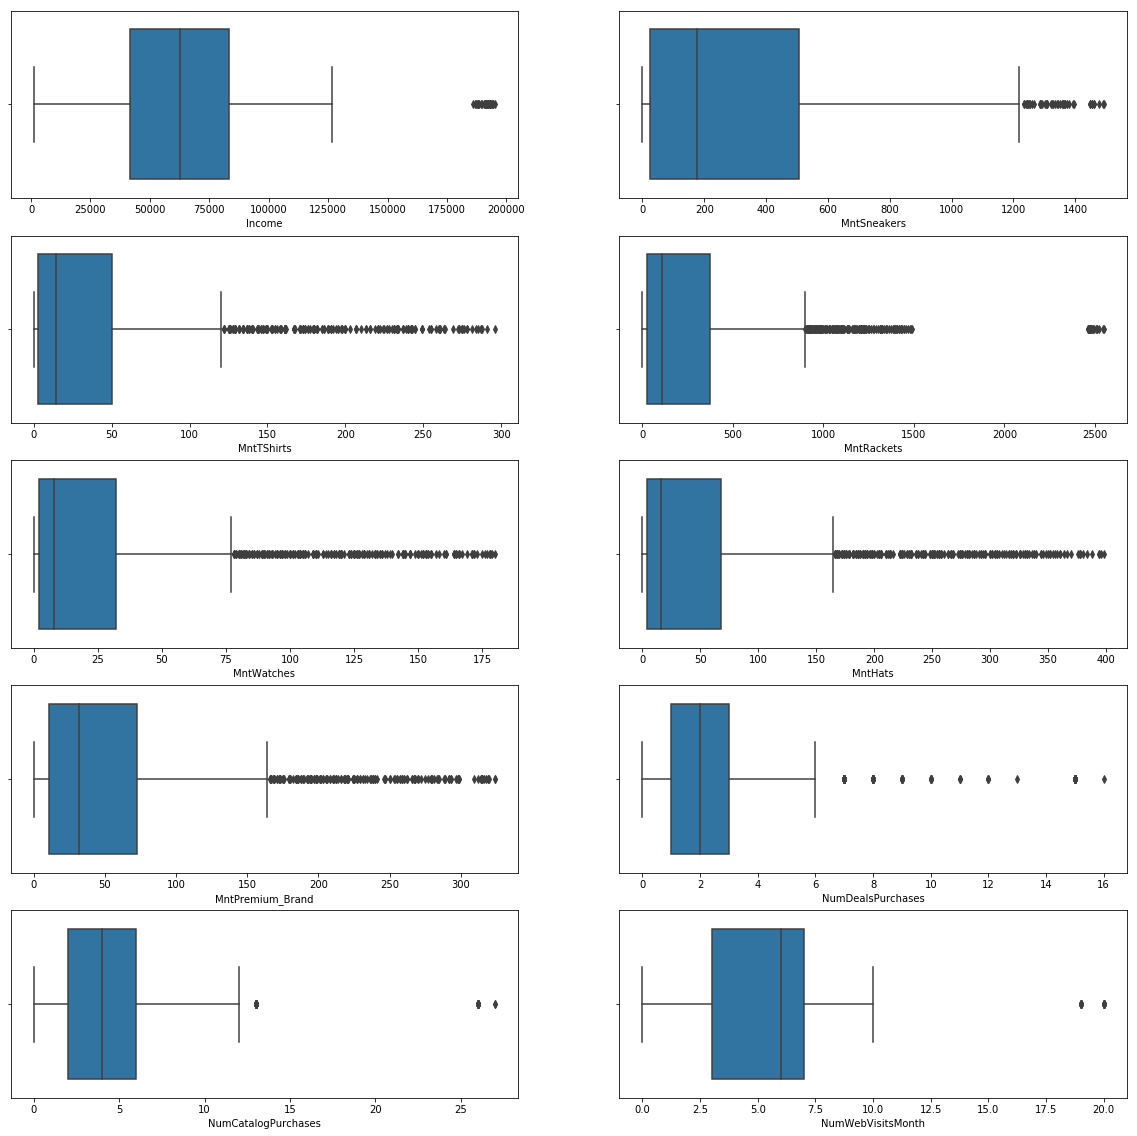

In [6]:
## Explore outliers
lagoste_outliers = lagoste.drop(['Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                                 'AcceptedCmp4','AcceptedCmp5','DepVar','Complain','Education','Marital_Status'],axis=1)

q_low = lagoste_outliers.quantile(.25)
q_high = lagoste_outliers.quantile(.75)
iqr = q_high - q_low 
iqr

outliers = ((lagoste_outliers < (q_low - 1.5 * iqr)) | (lagoste_outliers > (q_high + 1.5 * iqr))).sum()

outliers=outliers[outliers>0]

%matplotlib inline

var_outliers =outliers.index
fig, axes =plt.subplots(5,2,figsize=(20,20))

r=0
c=0
for var in var_outliers:
    if(c==2):
        c=0
        r=r+1
    sns.boxplot(lagoste[var], orient='h',ax=axes[r][c])
    c=c+1

**`Figure 1`** - Visualizations of variables containing outliers through boxplots

### 2.3 Data Cleaning 

In this section, we present some data cleaning steps we made in line with the pre-identified missing values, unnecessary variables and outliers.

__Step 1:__ Dropping unnecessary variables

In [7]:
lagoste_clean=lagoste.copy()

# For segmentation part drop columns
lagoste_clean.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','DepVar'],inplace=True)

__Step 2:__ Deal with missing values

In [8]:
# Deal with missing values
lagoste_clean.dropna(inplace=True)

__Step 3:__ Deal with outliers

Later, we will explore in detail our strategy to deal with extreme observations and outliers. Simply dropping outliers does not seem to be a reasonable way to deal with outliers since they represent real and meaningful information. Accordingly, we will address this issue after our data transformations and visualizations.

### 2.4 Data Transformation

This section presents some data transformations (construct data operations, formatting and integrating data) we made to support the modelling phase.


In [9]:
# hasHigherEduc
lagoste_clean['hasHigherEduc'] = np.where((lagoste_clean['Education']=='Graduation')|
                                        (lagoste_clean['Education']=='Master')|
                                        (lagoste_clean['Education']=='PhD'),1,0)

# isSingle
lagoste_clean['isSingle'] = np.where((lagoste_clean['Marital_Status']=='Together')|
                                        (lagoste_clean['Marital_Status']=='Married'),1,0)

# Age
lagoste_clean['Age'] = date.today().year - lagoste_clean['Year_Birth']

# totalMntSpent
lagoste_clean['totalMntSpent']=lagoste_clean['MntSneakers'] + lagoste_clean['MntRackets'] + lagoste_clean['MntTShirts'] + lagoste_clean['MntWatches']+lagoste_clean['MntHats']

#numberOFPurchases
lagoste_clean['numberOfPurchases'] = lagoste_clean['NumCatalogPurchases']+lagoste_clean['NumStorePurchases']+lagoste_clean['NumDealsPurchases']+lagoste_clean['NumWebPurchases']

# totalMntSpent
lagoste_clean['totalMntSpent']=lagoste_clean['MntSneakers'] + lagoste_clean['MntRackets'] + lagoste_clean['MntTShirts'] + lagoste_clean['MntWatches']+lagoste_clean['MntHats']+lagoste_clean["MntPremium_Brand"]

# share Sneaker/Rackets/TShirts/Watches/Hats/Premium on total Mnt
lagoste_clean['share_MntSneakers'] = lagoste_clean['MntSneakers']/lagoste_clean['totalMntSpent']
lagoste_clean['share_MntRackets'] = lagoste_clean['MntRackets']/lagoste_clean['totalMntSpent']
lagoste_clean['share_MntTShirts'] = lagoste_clean['MntTShirts']/lagoste_clean['totalMntSpent']
lagoste_clean['share_MntWatches'] = lagoste_clean['MntWatches']/lagoste_clean['totalMntSpent']
lagoste_clean['share_MntHats'] = lagoste_clean['MntHats']/lagoste_clean['totalMntSpent']
lagoste_clean['share_MntPremium'] = lagoste_clean['MntPremium_Brand']/lagoste_clean['totalMntSpent']

# share Store/Web/Deals/Catalog purchases on total numberOFPurchases
lagoste_clean['share_Store'] = (lagoste_clean['NumStorePurchases']/lagoste_clean['numberOfPurchases']).fillna(value=0)
lagoste_clean['share_Web']   = (lagoste_clean['NumWebPurchases']/lagoste_clean['numberOfPurchases']).fillna(value=0)
lagoste_clean['share_Deals'] = (lagoste_clean['NumDealsPurchases']/lagoste_clean['numberOfPurchases']).fillna(value=0)
lagoste_clean['share_Catalog'] = (lagoste_clean['NumCatalogPurchases']/lagoste_clean['numberOfPurchases']).fillna(value=0)


# drop unnecessary variables
lagoste_clean.drop(columns=['Education','Marital_Status','Year_Birth'],inplace=True)

### 2.5 Data Visualization

Before exploring our strategy in dealing with outliers, this section makes an overall visualization of our data. We are going to create different data visualizations by assessing the correlations between different variables. The objective is to increase the knowledge regarding which variables to include in each of the considered dimensions:
     1. Customer Value segmentation
     2. Product Usage segmentation

In [10]:
# identifying all variables
lagoste_clean.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntSneakers', 'MntTShirts', 'MntRackets', 'MntWatches', 'MntHats',
       'MntPremium_Brand', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'hasHigherEduc', 'isSingle', 'Age', 'totalMntSpent',
       'numberOfPurchases', 'share_MntSneakers', 'share_MntRackets',
       'share_MntTShirts', 'share_MntWatches', 'share_MntHats',
       'share_MntPremium', 'share_Store', 'share_Web', 'share_Deals',
       'share_Catalog'],
      dtype='object')

__Step 1:__ Visualizing correlations

Text(0.5, 1.0, 'Correlation between variables')

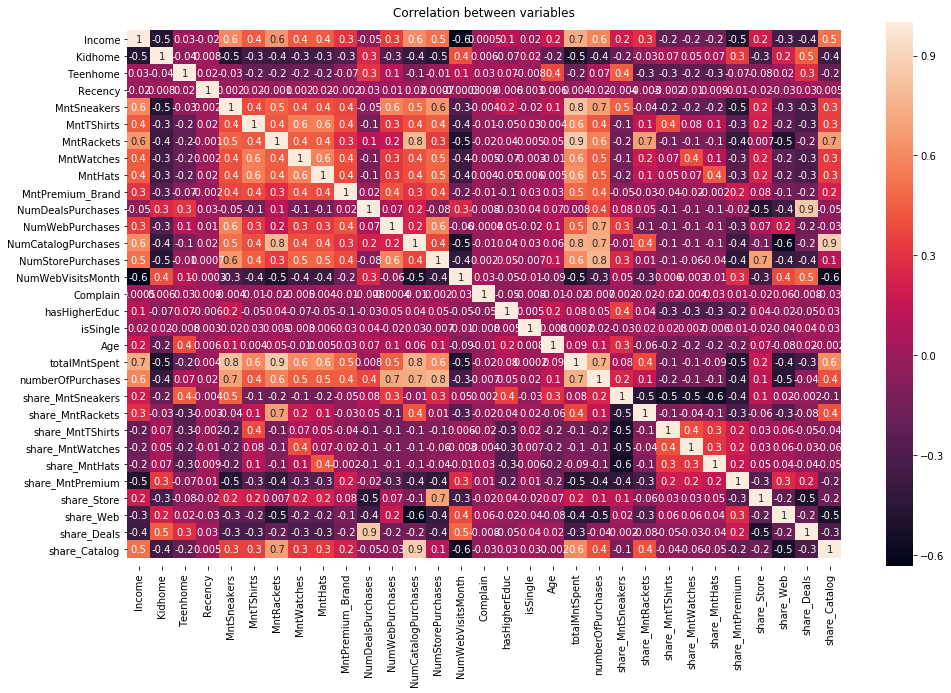

In [11]:
# Calculate correlations between variables
corr = lagoste_clean.corr()
# create a figure and change the size of the figure
figure = plt.figure(figsize=(16,10))
# plot the correlation between the variables
ax = plt.axes()
sns.heatmap(corr, annot=True, fmt = '.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation between variables')

**`Figure 2`** - Heatmap of correlations between all variables

__Step 2:__ Visualize key variables for product usage segmentation

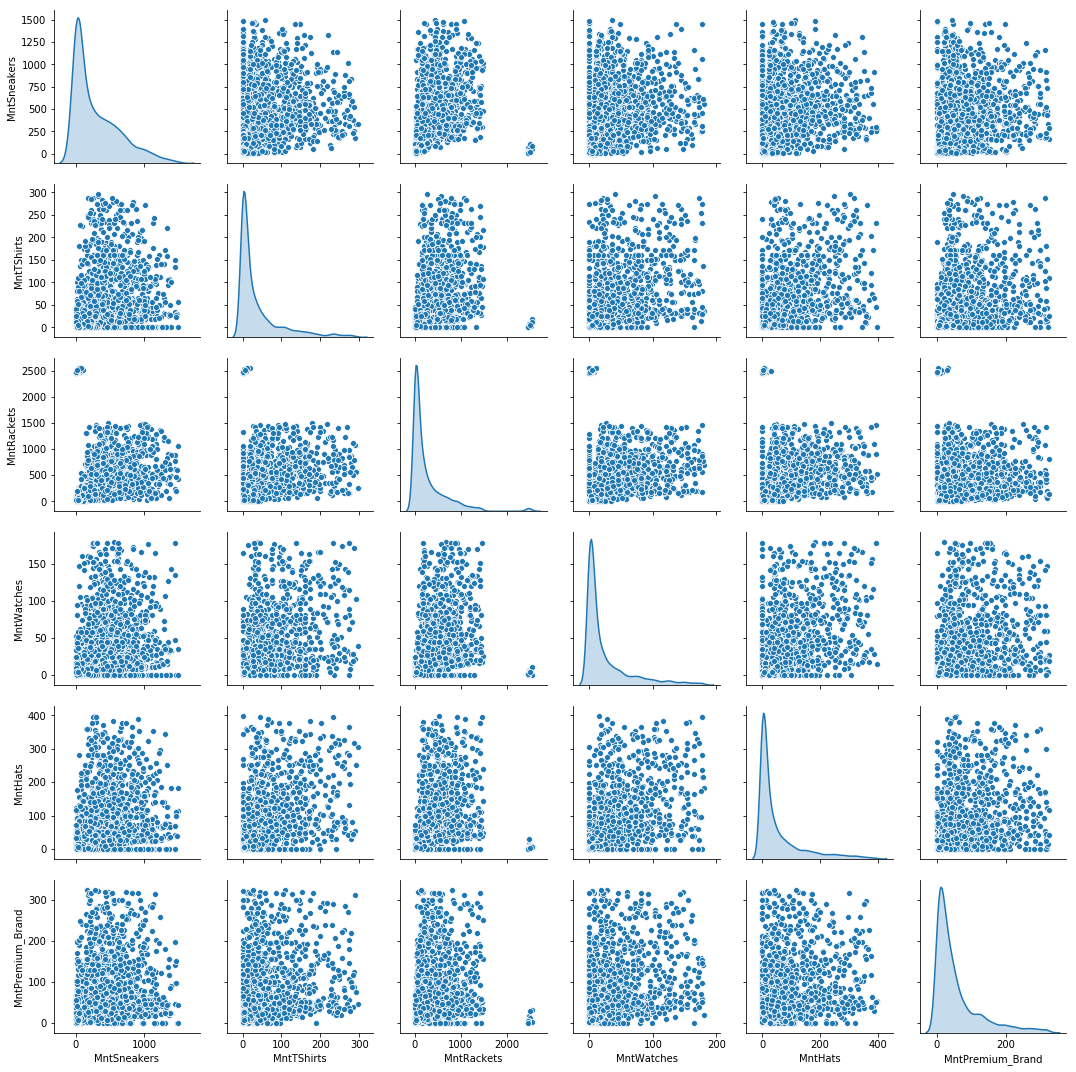

In [12]:
sns.pairplot(lagoste_clean,vars=["MntSneakers",'MntTShirts','MntRackets','MntWatches',
                                 'MntHats','MntPremium_Brand'], diag_kind="kde")

**`Figure 3`** - Pairplots of variables that could be related to product usage vision

__Step 3:__ Visualize key variables for customer value segmentation

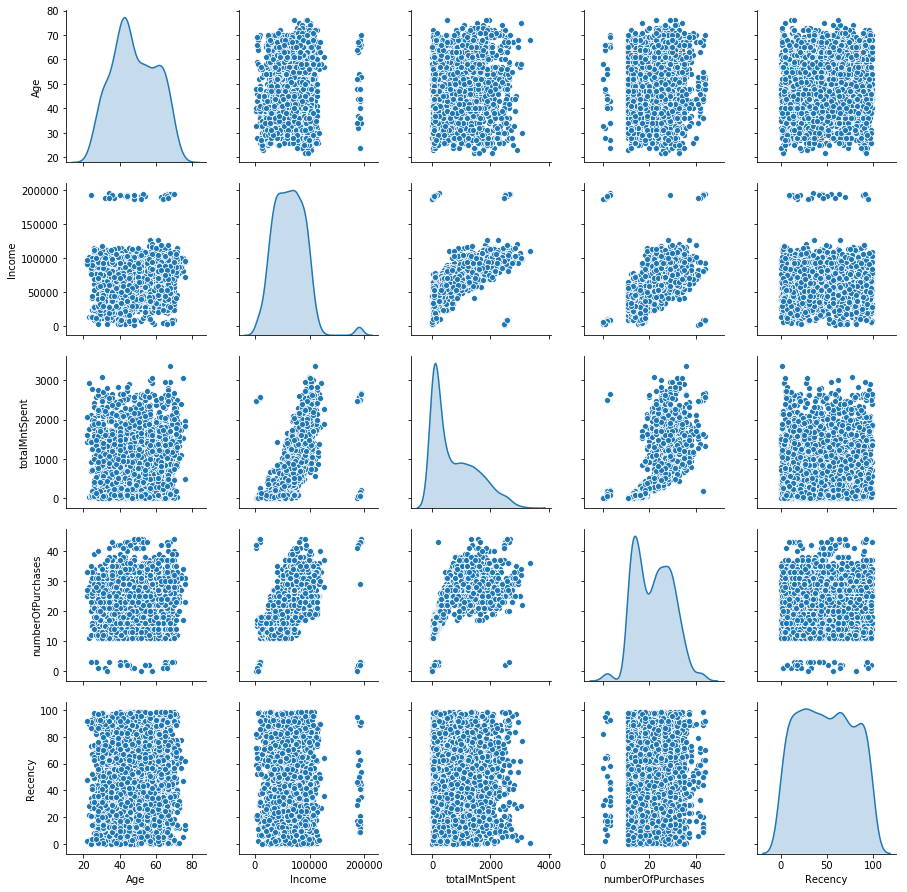

In [13]:
sns.pairplot(lagoste_clean,vars=['Age','Income','totalMntSpent','numberOfPurchases', 'Recency'], diag_kind="kde")

**`Figure 4`** - Pairplots of variables that could be related to the customer value vision

### 2.6 Dealling with outliers

After exploring and visualizing our dataset, we can identify interesting patterns on our data. Through the boxplot analysis (**`Figure 1`**), one can conclude they do not embody any data incoherence. They represent clients with specific characteristics and spending habits. Accordingly, merely dropping the outliers from our dataset does not seem to be a reasonable strategy.

Having in mind that the **k-means** model is highly sensitive to outliers, we decide to build a strategy to minimize results bias coming from our pre-identified outliers values. 

Economic theory suggests a positive association between income and spendings. Customers with higher income are more prone to spend, while clients with lower income levels tend to spend less. (Note: We are not going to explore credit market dynamics either problems related with response bias in our dataset).

After analyzing **`Figure 5`** we can identify three different groups of outliers, i.e. records that do not behave according to predefined economic theory:

    1) High Income and High Spending (top right)
    2) High Income and Low Spendings (bottom right)
    3) Low Income and High Spendings (top left)
    
Note that groups 1) and 2) represent all pre-identified Income outliers. Our strategy is to remove those three groups of outliers from our main daframe to conduct an accurate k-means model application. Additionally, we are going to identify the main characteristics of each of the three groups by analyzing particular patterns within each group. In other words, each of the three groups represents a cluster, and we are going to profiling each one. That way, we can minimize the noise in the modelling phase while not losing valuable information.

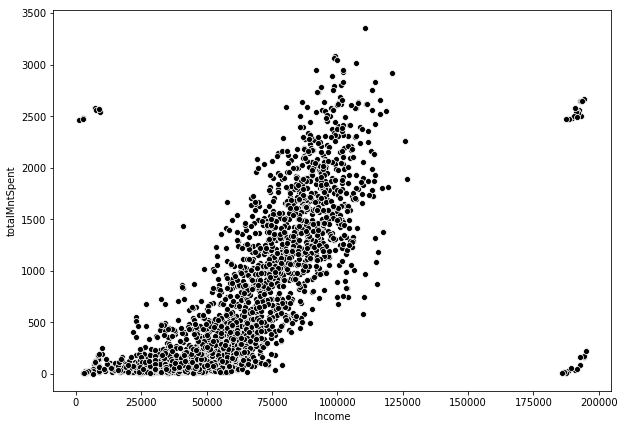

In [14]:
# scatterplot Income with totalMntSpent
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'Income', y = 'totalMntSpent', color = "black", data = lagoste_clean)

Dividimos em 4 e ficamos com o enchame. Os de cima à esquerda são (low income e muitos gastos)

**`Figure 5`** - Scatterplot of Income and totalMntSpent (lagoste_clean)

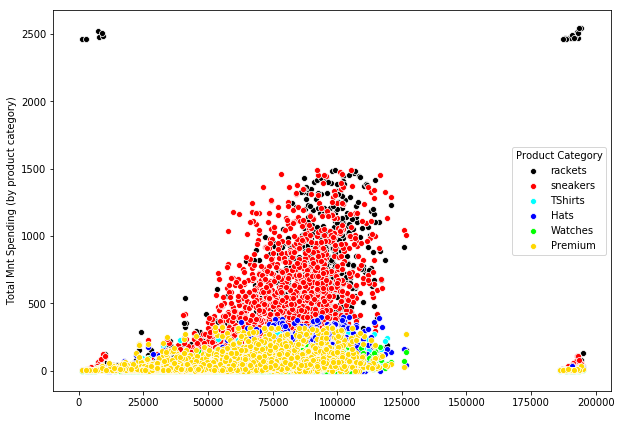

In [15]:
# scatterplot Income with MntSpndings by product category
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'Income', y = 'MntRackets', color="k", data = lagoste_clean, label= "rackets")
sns.scatterplot(x = 'Income', y = 'MntSneakers', color="r", data = lagoste_clean, label = "sneakers")
sns.scatterplot(x = 'Income', y = 'MntTShirts', color="aqua", data = lagoste_clean, label = "TShirts")
sns.scatterplot(x = 'Income', y = 'MntHats', color="b", data = lagoste_clean, label = "Hats")
sns.scatterplot(x = 'Income', y = 'MntWatches', color="lime", data = lagoste_clean, label = "Watches")
sns.scatterplot(x = 'Income', y = 'MntPremium_Brand', color="gold", data = lagoste_clean, label = "Premium")
plt.ylabel('Total Mnt Spending (by product category)')
plt.legend(title = 'Product Category')
plt.show()

Os de cima identificamos o cluster, mas o de baixo à direita não fizemos nada.

**`Figure 6`** - Scatterplot of Income and MntSpent by product category

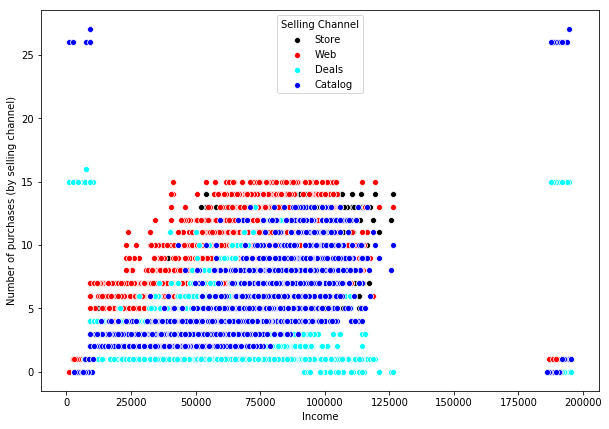

In [16]:
# scatterplot Income with NumberOFPurchases by selling channel
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', color="k", data = lagoste_clean, label= "Store")
sns.scatterplot(x = 'Income', y = 'NumWebPurchases', color="r", data = lagoste_clean, label = "Web")
sns.scatterplot(x = 'Income', y = 'NumDealsPurchases', color="aqua", data = lagoste_clean, label = "Deals")
sns.scatterplot(x = 'Income', y = 'NumCatalogPurchases', color="b", data = lagoste_clean, label = "Catalog")
plt.ylabel('Number of purchases (by selling channel)')
plt.legend(title = 'Selling Channel')
plt.show()

**`Figure 7`** - Scatterplot of Income and NumberOFPurchases by selling channel

#### 2.6.1 High Income and High Spendings (top right)

__Step 1:__ Identify outlier group

In [17]:
# outliers 1 (high income and high spendings)
outliers1 = lagoste_clean[(lagoste_clean.Income > 175000) & (lagoste_clean.totalMntSpent > 2000)]
print(outliers1.shape)
outliers1 = outliers1[["Income", "totalMntSpent", "share_MntRackets", "share_MntSneakers", "share_MntHats", "share_MntTShirts", "share_MntWatches", "share_MntPremium", "share_Web", "share_Store", "share_Catalog", "share_Deals"]].copy()
outliers1.head(16)

(16, 32)


Income  totalMntSpent  share_MntRackets  share_MntSneakers  \
Custid                                                                   
20009451  189660.0         2482.0          0.994359           0.001612   
20010859  192440.0         2561.0          0.968372           0.027333   
20016391  193329.0         2506.0          0.986832           0.009178   
20018359  191586.0         2554.0          0.970243           0.016053   
20022787  192067.0         2529.0          0.981811           0.011072   
20023391  188114.0         2477.0          0.995963           0.001615   
20024163  192992.0         2649.0          0.948660           0.039638   
20024499  191282.0         2537.0          0.974379           0.022862   
20028123  190593.0         2504.0          0.985224           0.012380   
20029111  193114.0         2644.0          0.948941           0.040091   
20030279  194466.0         2665.0          0.954972           0.019137   
20030423  191019.0         2583.0          0.966318           0.015873   
20030831  193741.0         2647.0          0.962599           0.030223   
20032803  191791.0         2492.0          0.990369           0.008427   
20034871  188463.0         2474.0          0.995958           0.003638   
20035327  187551.0         2470.0          0.997976           0.000405   

          share_MntHats  share_MntTShirts  share_MntWatches  share_MntPremium  \
Custid                                                                          
20009451       0.000403          0.000806          0.000403          0.002417   
20010859       0.000781          0.000781          0.000390          0.002343   
20016391       0.001197          0.001197          0.000798          0.000798   
20018359       0.006265          0.002349          0.002741          0.002349   
20022787       0.003163          0.001186          0.001186          0.001582   
20023391       0.000404          0.000404          0.000404          0.001211   
20024163       0.003775          0.003775          0.001888          0.002265   
20024499       0.000000          0.000000          0.000000          0.002759   
20028123       0.000000          0.000399          0.000000          0.001997   
20029111       0.002269          0.002648          0.001513          0.004539   
20030279       0.003002          0.006754          0.004128          0.012008   
20030423       0.011614          0.003097          0.001549          0.001549   
20030831       0.002267          0.004156          0.000000          0.000756   
20032803       0.000000          0.000401          0.000401          0.000401   
20034871       0.000000          0.000000          0.000000          0.000404   
20035327       0.000405          0.000405          0.000405          0.000405   

          share_Web  share_Store  share_Catalog  share_Deals  
Custid                                                        
20009451   0.023810     0.000000       0.619048     0.357143  
20010859   0.034483     0.034483       0.896552     0.034483  
20016391   0.023256     0.023256       0.604651     0.348837  
20018359   0.023256     0.023256       0.604651     0.348837  
20022787   0.023256     0.023256       0.604651     0.348837  
20023391   0.023810     0.000000       0.619048     0.357143  
20024163   0.023256     0.023256       0.604651     0.348837  
20024499   0.023256     0.023256       0.604651     0.348837  
20028123   0.500000     0.500000       0.000000     0.000000  
20029111   0.333333     0.333333       0.333333     0.000000  
20030279   0.022727     0.022727       0.613636     0.340909  
20030423   0.023256     0.023256       0.604651     0.348837  
20030831   0.023256     0.023256       0.604651     0.348837  
20032803   0.023256     0.023256       0.604651     0.348837  
20034871   0.023810     0.000000       0.619048     0.357143  
20035327   0.000000     0.000000       0.634146     0.365854

__Step 2:__ Clustering Profilling

This group represent costumers with high levels of income and high levels of spendings, see **`Figure 5`**. These clients belong to our pre-identified Income outliers, meaning they have an income that is substantially higher than the remaining customers. Moreover, between 95% and 100% of their spendings are on Rackets, see **`Figure 6`**. Additionally, these clients tend to make their purchase through deals and catalogue, rather than web or physical stores, see **`Figure 7`**. This cluster can be made of professional athletes or some related segment.

#### 2.6.2 High Income and Low Spendings

__Step 1:__ Identify outlier group

In [18]:
# outliers 2 (high income and low spendings)
outliers2 = lagoste_clean[(lagoste_clean.Income > 175000) & (lagoste_clean.totalMntSpent < 2000)]
print(outliers2.shape)
outliers2 = outliers2[["Income", "totalMntSpent", "share_MntRackets", "share_MntSneakers", "share_MntHats", "share_MntTShirts", "share_MntWatches", "share_MntPremium", "share_Web", "share_Store", "share_Catalog", "share_Deals"]].copy()
outliers2.head(12)

(12, 32)


Income  totalMntSpent  share_MntRackets  share_MntSneakers  \
Custid                                                                   
20011463  194482.0          163.0          0.411043           0.337423   
20015423  194400.0          175.0          0.462857           0.154286   
20017023  195163.0          223.0          0.578475           0.161435   
20018575  190912.0           38.0          0.210526           0.447368   
20020103  192961.0          162.0          0.234568           0.666667   
20020355  188166.0           31.0          0.064516           0.064516   
20028179  187310.0           11.0          0.363636           0.272727   
20030887  192727.0           88.0          0.522727           0.193182   
20032079  186850.0           21.0          0.380952           0.047619   
20034115  186126.0            8.0          0.250000           0.125000   
20037935  189392.0           55.0          0.200000           0.545455   
20043355  191684.0           52.0          0.288462           0.423077   

          share_MntHats  share_MntTShirts  share_MntWatches  share_MntPremium  \
Custid                                                                          
20011463       0.030675          0.085890          0.110429          0.024540   
20015423       0.137143          0.165714          0.017143          0.062857   
20017023       0.094170          0.103139          0.008969          0.053812   
20018575       0.052632          0.131579          0.026316          0.131579   
20020103       0.018519          0.000000          0.067901          0.012346   
20020355       0.322581          0.032258          0.096774          0.419355   
20028179       0.090909          0.090909          0.090909          0.090909   
20030887       0.068182          0.045455          0.034091          0.136364   
20032079       0.095238          0.095238          0.190476          0.190476   
20034115       0.250000          0.000000          0.125000          0.250000   
20037935       0.054545          0.000000          0.018182          0.181818   
20043355       0.076923          0.076923          0.057692          0.076923   

          share_Web  share_Store  share_Catalog  share_Deals  
Custid                                                        
20011463   0.333333     0.333333       0.333333          0.0  
20015423   0.333333     0.333333       0.333333          0.0  
20017023   0.333333     0.333333       0.333333          0.0  
20018575   0.500000     0.500000       0.000000          0.0  
20020103   0.333333     0.333333       0.333333          0.0  
20020355   1.000000     0.000000       0.000000          0.0  
20028179   1.000000     0.000000       0.000000          0.0  
20030887   0.333333     0.333333       0.333333          0.0  
20032079   1.000000     0.000000       0.000000          0.0  
20034115   0.000000     0.000000       0.000000          0.0  
20037935   0.500000     0.500000       0.000000          0.0  
20043355   0.500000     0.000000       0.500000          0.0

__Step 2:__ Clustering Profilling

This group represent costumers with high levels of income and low levels of spendings, see **`Figure 5`**. These clients belong to our pre-identified Income outliers, meaning they have an income that is substantially higher than the remaining customers. These clients do not behave according to economic theory since their spendings are quite low compared to their income. These clients do not show any pattern in terms of their prefered products, i.e. their tend do spread out their expenditures through all products, see **`Figure 6`**. The same applies in terms of the selling channel, see **`Figure 7`**. This segment is characterized by people who, despite having a high income, do not spend (most) on any of Lagoste products, and can be made of customers with less propensity to spend.

#### 4.6.3 Low Income and High Spendings

hare_MntRackets -> mostra que gastam em 97% do que gastam é em raquets.

Podem ser pessoas que joga em profissional e pede emmprestimos ou assim. Ou então é non-response bias, ou seja não dizem o que ganham

__Step 1:__ Identify outlier group

In [19]:
# outliers 3 (low income and high spendings)
outliers3 = lagoste_clean[(lagoste_clean.Income < 25000) & (lagoste_clean.totalMntSpent > 2000)]
print(outliers3.shape)
outliers3 = outliers3[["Income", "totalMntSpent", "share_MntRackets", "share_MntSneakers", "share_MntHats", "share_MntTShirts", "share_MntWatches", "share_MntPremium", "share_Web", "share_Store", "share_Catalog", "share_Deals"]].copy()
outliers3.head(7)

(7, 32)


Income  totalMntSpent  share_MntRackets  share_MntSneakers  \
Custid                                                                 
20015323  7509.0         2583.0          0.976384           0.014324   
20022915  7715.0         2555.0          0.969863           0.018004   
20028551  2701.0         2480.0          0.993548           0.000806   
20028951  9313.0         2539.0          0.980307           0.011422   
20032015  1134.0         2467.0          0.998784           0.000405   
20033699  2746.0         2477.0          0.995155           0.000404   
20035379  9016.0         2573.0          0.974738           0.008162   

          share_MntHats  share_MntTShirts  share_MntWatches  share_MntPremium  \
Custid                                                                          
20015323       0.002710          0.001161          0.002323          0.003097   
20022915       0.001174          0.003523          0.001174          0.006262   
20028551       0.000806          0.000806          0.000806          0.003226   
20028951       0.001575          0.002757          0.002363          0.001575   
20032015       0.000405          0.000000          0.000000          0.000405   
20033699       0.000404          0.001615          0.000807          0.001615   
20035379       0.001555          0.002332          0.001555          0.011660   

          share_Web  share_Store  share_Catalog  share_Deals  
Custid                                                        
20015323   0.023256     0.023256       0.604651     0.348837  
20022915   0.022727     0.022727       0.590909     0.363636  
20028551   0.023810     0.000000       0.619048     0.357143  
20028951   0.023256     0.023256       0.604651     0.348837  
20032015   0.000000     0.000000       0.634146     0.365854  
20033699   0.023810     0.000000       0.619048     0.357143  
20035379   0.022727     0.022727       0.613636     0.340909

__Step 2:__ Clustering Profilling

This group represent costumers with low levels of income and high levels of spendings, see **`Figure 5`**. Despite having low levels of income, these clients tend to spend well above the average sample. They share the same characteristics than group 1 outliers, i.e. between 97% and 99% of their total spendings are on rackets, see **`Figure 6`**. Additionally, these clients tend to make their purchase through deals and catalogue, rather than web or physical stores, see **`Figure 7`**. This cluster can also be made of professional athletes or some related segment, as well as non-professional players that rely on loans to buy expensive sports equipment.

#### 4.6.4 Final Dataframe

After removing the three pre-identified groups from our dataset, we are now able to conduct our modelling analysis on the remaining observations. For that, we will start by computing and visualizing our final dataset.

In [20]:
# initial dataframe shape (lagoste_clean)
print(lagoste_clean.shape[0])

# outliers 1 (high income and high spendings)
print(outliers1.shape[0])

# outliers 2 (high income and low spendings)
print(outliers2.shape[0])

# outliers 3 (low income and high spendings)
print(outliers3.shape[0])

# final dataframe (lagoste_clean_outl)
lagoste_clean_outl = lagoste_clean[(lagoste_clean.Income < 175000)]
lagoste_clean_outl = lagoste_clean_outl[~((lagoste_clean_outl.Income < 25000) & (lagoste_clean_outl.totalMntSpent > 2000))]
print(lagoste_clean_outl.shape[0])

2388
16
12
7
2353


(0, 3500)

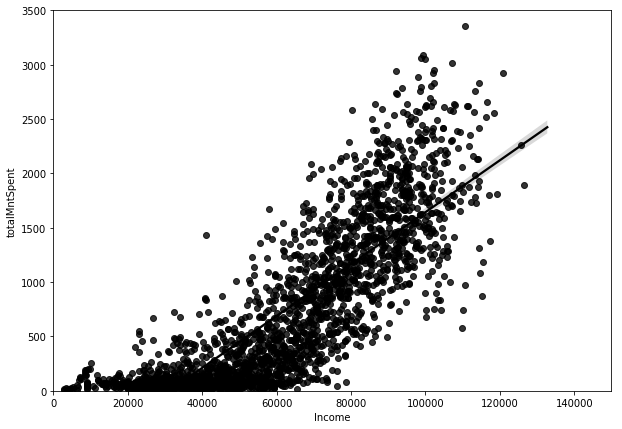

In [21]:
# final dataframe
plt.figure(figsize = (10,7))
sns.regplot(x = 'Income', y = 'totalMntSpent', color = "k", data = lagoste_clean_outl)
plt.xlim(0,150000)
plt.ylim(0,3500)

Como querem saber os profits interessa saber o income.

**`Figure 8`** - Scatterplot of Income and totalMntSpent (lagoste_clean_outl)

## 3. Modelling

This section explores the application of an unsupervised machine learning technique within Lagoste Stores segmentation problem.  As mentioned earlier in this document, we decided to apply the **k-means** model to our dataset considering two distinct visions:
     1. Customer Value segmentation
     2. Product Usage segmentation

Divider em product (só montantes, quanto as pessoas gastaram em cada coisa) e no costumer (dados das pessoas)

### 3.1 Product usage segmentation

Divide the customers based on their needs, attitudes and interests, taking into consideration their product usage.


#### 3.1.1 Exploring the Variables

__Step 1__ Choosing variables

In [22]:
# Chosen variables for model
lagoste_prod = lagoste_clean_outl[['share_MntSneakers', "share_MntRackets", 'share_MntTShirts', "share_MntWatches", "share_MntHats", "share_MntPremium"]].copy()
lagoste_prod.head()

share_MntSneakers  share_MntRackets  share_MntTShirts  \
Custid                                                            
20004103           0.288740          0.515050          0.058528   
20004111           0.144330          0.154639          0.123711   
20004115           0.434286          0.205714          0.107755   
20004131           0.809524          0.142857          0.000000   
20004143           0.279570          0.374389          0.180841   

          share_MntWatches  share_MntHats  share_MntPremium  
Custid                                                       
20004103          0.070234       0.046823          0.020624  
20004111          0.000000       0.206186          0.371134  
20004115          0.039184       0.071837          0.141224  
20004131          0.000000       0.000000          0.047619  
20004143          0.061584       0.074291          0.029326

% montante de cada produto / total gasto -> ou seja cada linha dá 100%

__Step 2:__ Visualizing the variables

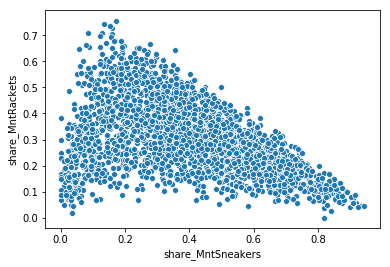

In [23]:
sns.scatterplot(x = 'share_MntSneakers', y = 'share_MntRackets', data = lagoste_clean_outl)

**`Figure 9`** - Scatterplot of share_MntRackets and share_MntSnbeakers

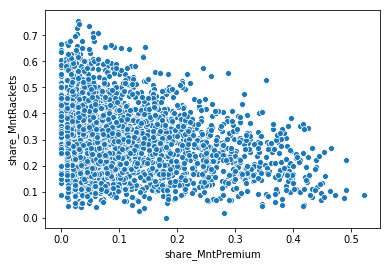

In [24]:
sns.scatterplot(x = 'share_MntPremium', y = 'share_MntRackets', data = lagoste_clean_outl)

**`Figure 10`** - Scatterplot of share_MntRackets and share_MntPremium

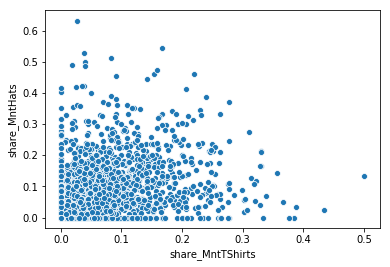

In [25]:
sns.scatterplot(x = 'share_MntTShirts', y = 'share_MntHats', data = lagoste_clean_outl)

**`Figure 11`** - Scatterplot of share_MntHats and share_MntTShirts

__Step 3__ Visualizing correlations between variables

Text(0.5, 1.0, 'Correlation between possible variables of customer value vision')

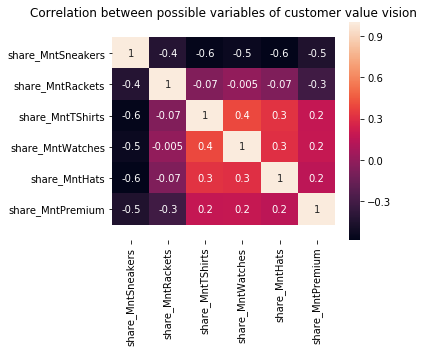

In [26]:
# Calculate correlations between variables
corr2 = lagoste_prod.corr()
# create a figure and change the size of the figure
figure2 = plt.figure(figsize=(5,4))
# plot the correlation between the variables
ax = plt.axes()
sns.heatmap(corr2, annot=True, fmt = '.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation between possible variables of customer value vision')

Entram todas porque não existem correlações

**`Figure 12`** - Correlations between variables that will be used for the product usage vision

The variables chosen for the model were: **share_MntSneakers**, **share_MntRackets**, **share_MntTShirts**, **share_MntWatches**, **share_MntHats**, and **share_MntPremium**. This choice was made after analyzing different models with all variables. We decided to include all Lagoste product categories since none of them appears to be highly correlated with the others. Moreover, since we have transformed all product variables in proportions of the total spendings, they are already normalized, having values between 0 and 1.

#### 3.1.2 Creating the model

__Step 1:__ Create a new dataframe, named `lagoste_prod` where we are going to select only the variables needed for the product usage segmentation

In [27]:
lagoste_prod = lagoste_clean_outl[['share_MntSneakers', "share_MntRackets", 'share_MntTShirts', "share_MntWatches", "share_MntHats", "share_MntPremium"]].copy()
lagoste_prod.head()

share_MntSneakers  share_MntRackets  share_MntTShirts  \
Custid                                                            
20004103           0.288740          0.515050          0.058528   
20004111           0.144330          0.154639          0.123711   
20004115           0.434286          0.205714          0.107755   
20004131           0.809524          0.142857          0.000000   
20004143           0.279570          0.374389          0.180841   

          share_MntWatches  share_MntHats  share_MntPremium  
Custid                                                       
20004103          0.070234       0.046823          0.020624  
20004111          0.000000       0.206186          0.371134  
20004115          0.039184       0.071837          0.141224  
20004131          0.000000       0.000000          0.047619  
20004143          0.061584       0.074291          0.029326

__Step 2:__ Measure the quality of clusterings with different numbers of clusters.  For each of the given values of `k`, we will perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.
  - Plot the inertia to see which is the preferable number of clusters.

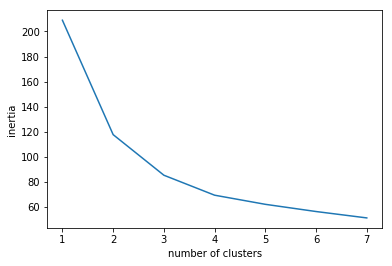

In [28]:
from sklearn.cluster import KMeans


ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(lagoste_prod)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
    
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()    


**`Figure 13`** - Elbow test for clustering in the product usage vision

You can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

**Step 3:** Using `KMeans()`, create a `KMeans` instance called `model_prod` to find `3` clusters.

In [29]:
model_prod = KMeans(n_clusters=3)

**Step 4:** Use the `.fit()` method of `model_prod` to fit the model to the dataframe .`lagoste_prod`.

In [30]:
model_prod.fit(lagoste_prod)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

__Step 5:__ Create a new column in the dataframe named `label_prod`, which will store the cluster number that each observation belongs to. 

In [31]:
lagoste_prod['label_prod'] = model_prod.labels_
lagoste_prod

share_MntSneakers  share_MntRackets  share_MntTShirts  \
Custid                                                            
20004103           0.288740          0.515050          0.058528   
20004111           0.144330          0.154639          0.123711   
20004115           0.434286          0.205714          0.107755   
20004131           0.809524          0.142857          0.000000   
20004143           0.279570          0.374389          0.180841   
...                     ...               ...               ...   
20044003           0.040816          0.163265          0.176871   
20044031           0.341346          0.164663          0.031250   
20044079           0.400000          0.325000          0.062500   
20044087           0.511312          0.314731          0.025138   
20044095           0.434316          0.365952          0.022118   

          share_MntWatches  share_MntHats  share_MntPremium  label_prod  
Custid                                                                   
20004103          0.070234       0.046823          0.020624           2  
20004111          0.000000       0.206186          0.371134           0  
20004115          0.039184       0.071837          0.141224           1  
20004131          0.000000       0.000000          0.047619           1  
20004143          0.061584       0.074291          0.029326           2  
...                    ...            ...               ...         ...  
20044003          0.027211       0.217687          0.374150           0  
20044031          0.022837       0.050481          0.389423           0  
20044079          0.050000       0.075000          0.087500           2  
20044087          0.037707       0.100553          0.010558           1  
20044095          0.065684       0.017426          0.094504           2  

[2353 rows x 7 columns]

#### 3.1.3 Exploring and visualizing results

__Step 1:__ Have a look at the descriptive statistics for each cluster it in the object `descr_prod`. 

In [32]:
descr_prod = lagoste_prod.groupby(['label_prod']).describe().transpose()
descr_prod

label_prod                        0           1           2
share_MntSneakers count  505.000000  855.000000  993.000000
                  mean     0.145439    0.622072    0.321101
                  std      0.100193    0.117882    0.101344
                  min      0.000000    0.399516    0.050000
                  25%      0.060606    0.531176    0.250875
                  50%      0.123894    0.608163    0.332188
                  75%      0.209302    0.703576    0.398305
                  max      0.404412    0.943409    0.526903
share_MntRackets  count  505.000000  855.000000  993.000000
                  mean     0.243237    0.206658    0.418554
                  std      0.090868    0.079736    0.104000
                  min      0.017544    0.000000    0.150202
                  25%      0.171548    0.149509    0.341672
                  50%      0.239796    0.205882    0.413793
                  75%      0.313433    0.264050    0.482980
                  max      0.486486    0.421053    0.756173
share_MntTShirts  count  505.000000  855.000000  993.000000
                  mean     0.124345    0.027431    0.059871
                  std      0.085666    0.034071    0.050197
                  min      0.000000    0.000000    0.000000
                  25%      0.059553    0.000000    0.024070
                  50%      0.109091    0.013129    0.047324
                  75%      0.174603    0.038341    0.084746
                  max      0.500000    0.227838    0.333333
share_MntWatches  count  505.000000  855.000000  993.000000
                  mean     0.072975    0.016695    0.039543
                  std      0.057281    0.021712    0.035036
                  min      0.000000    0.000000    0.000000
                  25%      0.030303    0.000000    0.014535
                  50%      0.062992    0.008013    0.032732
                  75%      0.101010    0.021967    0.054054
                  max      0.336634    0.150442    0.409091
share_MntHats     count  505.000000  855.000000  993.000000
                  mean     0.159655    0.032523    0.075860
                  std      0.113827    0.041029    0.058308
                  min      0.000000    0.000000    0.000000
                  25%      0.074074    0.000000    0.031746
                  50%      0.142857    0.016807    0.062407
                  75%      0.227121    0.047917    0.110174
                  max      0.631579    0.254879    0.316627
share_MntPremium  count  505.000000  855.000000  993.000000
                  mean     0.254349    0.094621    0.085070
                  std      0.108749    0.080983    0.065781
                  min      0.000000    0.000000    0.000000
                  25%      0.170000    0.032627    0.031250
                  50%      0.253968    0.068421    0.068799
                  75%      0.333333    0.137934    0.122748
                  max      0.521739    0.453125    0.352941

**`Figure 14`** - Description of variables by clusters in the product usage vision

__Step 2:__ Create a new dataframe that will be composed by the individuals of each cluster.

In [33]:
# create 3 dataframes for each cluster
cluster0_prod = lagoste_prod[lagoste_prod.label_prod==0]
cluster1_prod = lagoste_prod[lagoste_prod.label_prod==1]
cluster2_prod = lagoste_prod[lagoste_prod.label_prod==2]

__Step 3:__ We are going to obtain the coordinates of the centroids using the `.cluster_centers_` attribute of `model` and assign them to `centroids_prod`.

In [34]:
centroids_prod = model.cluster_centers_
centroids_prod

array([[0.22518124, 0.53205779, 0.05460067, 0.04010279, 0.06905425,
        0.07900326],
       [0.33045177, 0.26063234, 0.05172585, 0.03686644, 0.05156838,
        0.26875522],
       [0.7541564 , 0.14343846, 0.00948534, 0.0065077 , 0.01175096,
        0.07466114],
       [0.56161109, 0.24293278, 0.03845501, 0.02301444, 0.04555093,
        0.08843576],
       [0.1868356 , 0.31454105, 0.13715163, 0.07218479, 0.17282339,
        0.11646354],
       [0.07200981, 0.19865675, 0.13512579, 0.08432487, 0.19465706,
        0.31522573],
       [0.39905911, 0.37911739, 0.05371996, 0.03415378, 0.06726592,
        0.06668384]])

__Step 4:__ Extract the individual values by using the results stored in centroids `centroids_prod`. 

- Save the centroid value of cluster0 concerning the variable Sneakers in: `centroid_0_Sneakers`, `centroid_1_Sneakers`, `centroid_2_Sneackers`. 

- Apply the same logic for all 6 variables `Sneakers`, `Rackets`, `TShirts`, `Watches`, `Hats`, and `Premium`.

In [35]:
# Sneakers
centroid_0_Sneakers = centroids_prod[0,0]
centroid_1_Sneakers = centroids_prod[1,0]
centroid_2_Sneakers = centroids_prod[2,0]

# Rackets
centroid_0_Rackets = centroids_prod[0,1]
centroid_1_Rackets = centroids_prod[1,1]
centroid_2_Rackets = centroids_prod[2,1]

# TShirts
centroid_0_TShirts = centroids_prod[0,2]
centroid_1_TShirts = centroids_prod[1,2]
centroid_2_TShirts = centroids_prod[2,2]

# Watches
centroid_0_Watches = centroids_prod[0,3]
centroid_1_Watches = centroids_prod[1,3]
centroid_2_Watches = centroids_prod[2,3]

# Hats
centroid_0_Hats = centroids_prod[0,4]
centroid_1_Hats = centroids_prod[1,4]
centroid_2_Hats = centroids_prod[2,4]

# Premium
centroid_0_Premium = centroids_prod[0,5]
centroid_1_Premium = centroids_prod[1,5]
centroid_2_Premium = centroids_prod[2,5]

__Step 5:__ First, we are going to create four `sns.distplots()` for each variable that will show the distribution of the variables for each cluster and for the whole products population. 

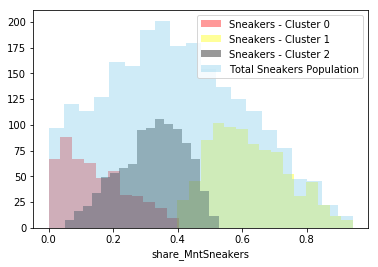

In [36]:
# Sneakers
sns.distplot(cluster0_prod['share_MntSneakers'],color='red',label='Sneakers - Cluster 0', kde = False)
sns.distplot(cluster1_prod['share_MntSneakers'],color='yellow',label='Sneakers - Cluster 1', kde = False)
sns.distplot(cluster2_prod["share_MntSneakers"],color='black',label='Sneakers - Cluster 2', kde = False)
sns.distplot(lagoste_prod['share_MntSneakers'],color='skyblue',label='Total Sneakers Population', kde = False)
plt.legend()

os amarelos gastam imenso em sneckers

**`Figure 15`** - Visualization of variable share_MntSneakers by cluster

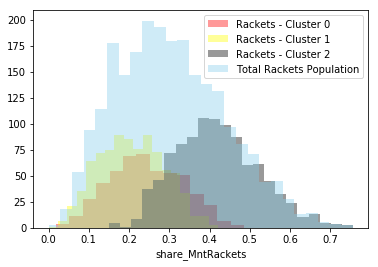

In [37]:
# Rackets
sns.distplot(cluster0_prod['share_MntRackets'],color='red',label='Rackets - Cluster 0', kde = False)
sns.distplot(cluster1_prod['share_MntRackets'],color='yellow',label='Rackets - Cluster 1', kde = False)
sns.distplot(cluster2_prod["share_MntRackets"],color='black',label='Rackets - Cluster 2', kde = False)
sns.distplot(lagoste_prod['share_MntRackets'],color='skyblue',label='Total Rackets Population', kde = False)
plt.legend()

Aqui vesse que os amarelos já nao gatsam em rakets

**`Figure 16`** - Visualization of variable share_MntRackets by cluster

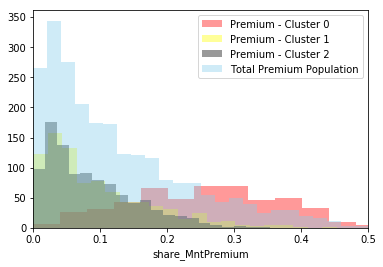

In [38]:
# Premium
sns.distplot(cluster0_prod['share_MntPremium'],color='red',label='Premium - Cluster 0', kde = False)
sns.distplot(cluster1_prod['share_MntPremium'],color='yellow',label='Premium - Cluster 1', kde = False)
sns.distplot(cluster2_prod["share_MntPremium"],color='black',label='Premium - Cluster 2', kde = False)
sns.distplot(lagoste_prod['share_MntPremium'],color='skyblue',label='Total Premium Population', kde = False)
plt.xlim(0,0.5)
plt.legend()

**`Figure 17`** - Visualization of variable share_MntPremium by cluster

__Step 6:__ Finnaly, we will create four `sns.scatter()` (one for each cluster plus the population) for each product.


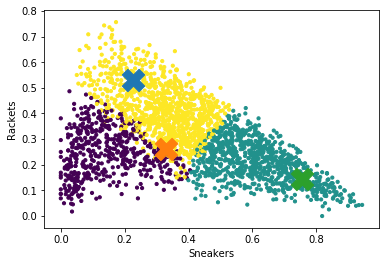

In [39]:
# Sneakers vs Rackets
plt.scatter(lagoste_prod.share_MntSneakers, lagoste_prod.share_MntRackets, c=lagoste_prod.label_prod, s=10)
plt.scatter(centroid_0_Sneakers, centroid_0_Rackets, marker='X', s=500)
plt.scatter(centroid_1_Sneakers, centroid_1_Rackets, marker='X', s=500)
plt.scatter(centroid_2_Sneakers, centroid_2_Rackets, marker='X', s=500)
plt.xlabel("Sneakers")
plt.ylabel("Rackets")
plt.show()

**`Figure 18`** - Visualization of variable share_MntSneakers by share_MntRackets by clusters and theirs centroids

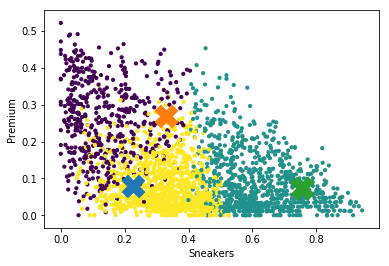

In [40]:
# Sneakers vs Premium
plt.scatter(lagoste_prod.share_MntSneakers, lagoste_prod.share_MntPremium, c=lagoste_prod.label_prod, s=10)
plt.scatter(centroid_0_Sneakers, centroid_0_Premium, marker='X', s=500)
plt.scatter(centroid_1_Sneakers, centroid_1_Premium, marker='X', s=500)
plt.scatter(centroid_2_Sneakers, centroid_2_Premium, marker='X', s=500)
plt.xlabel("Sneakers")
plt.ylabel("Premium")
plt.show()

verde - compram muitos snekers

**`Figure 19`** - Visualization of variable share_MntSneakers by share_MntPremium by clusters and theirs centroids

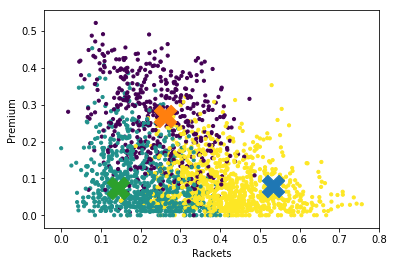

In [41]:
# Rackets vs Premium
plt.scatter(lagoste_prod.share_MntRackets, lagoste_prod.share_MntPremium, c=lagoste_prod.label_prod, s=10)
plt.scatter(centroid_0_Rackets, centroid_0_Premium, marker='X', s=500)
plt.scatter(centroid_1_Rackets, centroid_1_Premium, marker='X', s=500)
plt.scatter(centroid_2_Rackets, centroid_2_Premium, marker='X', s=500)
plt.xlabel("Rackets")
plt.ylabel("Premium")
plt.show()

**`Figure 20`** - Visualization of variable share_MntRackets by share_MntPremium by clusters and theirs centroids

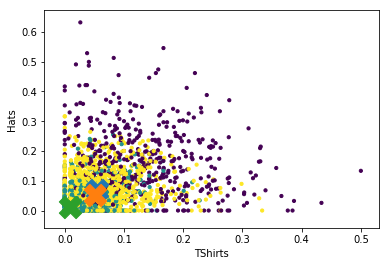

In [42]:
# TShirts vs Hats
plt.scatter(lagoste_prod.share_MntTShirts, lagoste_prod.share_MntHats, c=lagoste_prod.label_prod, s=10)
plt.scatter(centroid_0_TShirts, centroid_0_Hats, marker='X', s=500)
plt.scatter(centroid_1_TShirts, centroid_1_Hats, marker='X', s=500)
plt.scatter(centroid_2_TShirts, centroid_2_Hats, marker='X', s=500)
plt.xlabel("TShirts")
plt.ylabel("Hats")
plt.show()

**`Figure 21`** - Visualization of variable share_MntTShirts by share_MntHats by clusters and theirs centroids

#### 3.1.4. Cluster Profiling

After analysing the results from the k-means, we can conclude that there is a distinct segmentation between 3 main categories of products: sneakers, rackets and premium products. All remain products (TShirts, Hats and Watches) appear to be consumed homogeneously. According to our results, cluster 0 clients spend an essential proportion on rackets, a middle proportion on sneakers and almost nothing on the remaining products, see **`Figures 14 and 15-17`**. In contrast, cluster 1 clients spend an important portion on sneakers, a middle proportion on rackets and almost nothing on the remaining products, see **`Figures 14 and 15-17`**. Finally, clients from cluster 2 are more likely to smooth their consumption through the different products, spending the most on Premium products, see **`Figures 14 and 15-17`**.

### 3.2. Customer Value Vision

The customer value vision evaluates groups of customers in terms of revenue generated and the costs of mantaining relationships with them. 

#### 3.2.1. Exploring the variables

__Step 1:__ Creating new variables

In [43]:
# Calculate average order value
lagoste_clean_outl['AOV'] = np.where(lagoste_clean_outl['numberOfPurchases']==0, 
                                          0, 
                                          (lagoste_clean_outl['totalMntSpent']/lagoste_clean_outl['numberOfPurchases']).round(decimals=3))


# how many days since being a customer
diff = pd.to_datetime(date.today()) - lagoste_clean_outl['Dt_Customer']
lagoste_clean_outl['days_Customer']=diff.astype('timedelta64[D]')


__Step 2:__ Visualizing the variables

Text(0.5, 1.0, 'Analyzing totalMntSpent by numberOfPurchases with income perspective')

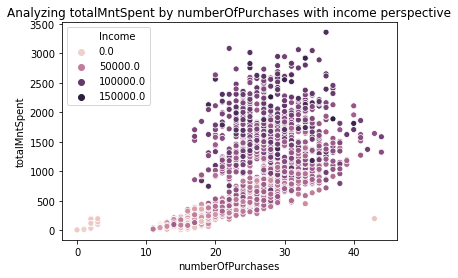

In [44]:
sns.scatterplot(x = 'numberOfPurchases', y = 'totalMntSpent', hue = 'Income', data = lagoste_clean_outl)
plt.title('Analyzing totalMntSpent by numberOfPurchases with income perspective')

**`Figure 22`** - Scatterplot of totalMntSpent by numberOfPurchases Income MntRackets visualization

Text(0.5, 1.0, 'Analyzing mntByPurchase by Income with recency perspective')

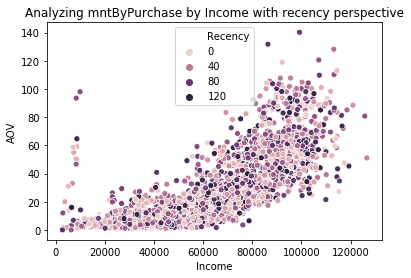

In [45]:
sns.scatterplot(x = 'Income', y = 'AOV', hue = 'Recency', data = lagoste_clean_outl)
plt.title('Analyzing mntByPurchase by Income with recency perspective')

Quanto mais ganhas mais gastas em media por compra

**`Figure 23`** - Scatterplot of AOV by Income and Recency visualization

Text(0.5, 1.0, 'Analyzing totalMntSpent by Income with days as a customer perspective')

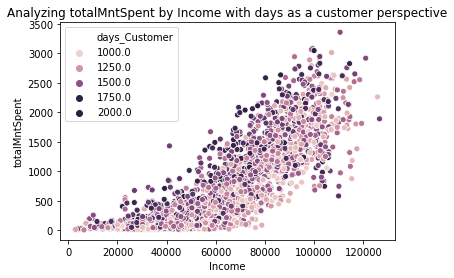

In [46]:
sns.scatterplot(x = 'Income', y = 'totalMntSpent', hue = 'days_Customer', data = lagoste_clean_outl)
plt.title('Analyzing totalMntSpent by Income with days as a customer perspective')

Grafico do enxame já sem outliers. Relação entre imcome e o total spent

**`Figure 24`** - Scatterplot of totalMntSpent by Income and days_Customer visualization

In [47]:
cust_Value= lagoste_clean_outl[['Income','Age','days_Customer','Recency', 'totalMntSpent','numberOfPurchases','AOV',
                                'share_Web', 'share_Store', 'share_Catalog', 'share_Deals']]

days_Customer: quantos dias é cliente
Recency: quantos dias foi a ultima compra
AOV: gasto medio por compra
share_Web: dá 100% o share por canal de distribuição.
share_Deals: % de compras nas promoções, "Black friday"


__Step 3:__ Visualizing correlations between variables

Text(0.5, 1.0, 'Correlation between possible variables of customer value vision')

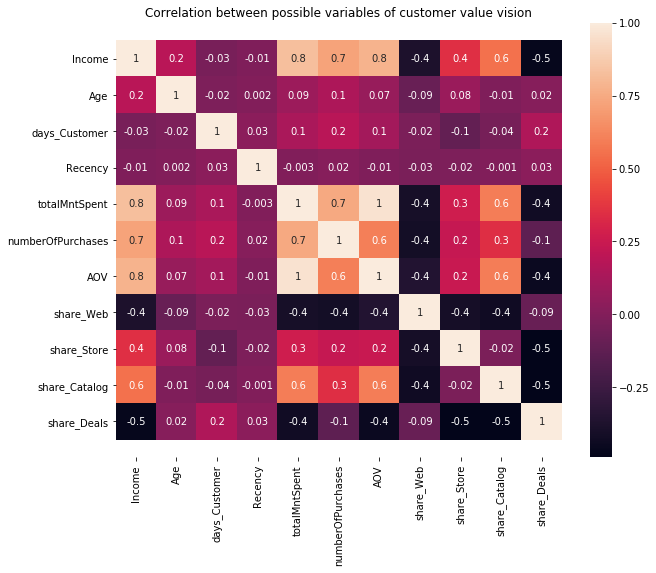

In [48]:
# Calculate correlations between variables
corr = cust_Value.corr()
# create a figure and change the size of the figure
figure = plt.figure(figsize=(10,8))
# plot the correlation between the variables
ax = plt.axes()
sns.heatmap(corr, annot=True, fmt = '.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation between possible variables of customer value vision')

**`Figure 25`** - Correlations between variables that will be used for the customer value vision

__Step 4:__ Selecting variables for the model

In [49]:
# Chosen variables for model
cust_Value= lagoste_clean_outl[['Income','Recency','totalMntSpent','numberOfPurchases','share_Deals']]

The variables chosen for the model were: **income**, **recency** , **totalMntSpent**, **numberOFPurchases** and **share_Deals**. This choice was made after analysing differences in models with all variables, and we concluded that variables **age**, **days_Customer**, **isSingle**, and **hasHigherEduc** didn't provide any added knowledge to the clusters. Between the variables totalMntSpent, numberOfPurchases and AOV, we had to choose since they give related insights. We decided on **totalMntSpent** and **numberOfPurchases** because results are better with that model specification.

#### 3.2.2. Creating the model

In [50]:
#Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

__Step 1__: Apply scaling to the dataset because variables have different base units

In [51]:
# Apply scaling MinMaxScaler
min_max1 = MinMaxScaler().fit(cust_Value)

cust_Value_scld = min_max1.transform(cust_Value)
cust_Value_scld = pd.DataFrame(cust_Value_scld, columns = cust_Value.columns)
cust_Value_scld.head(5)


Income   Recency  totalMntSpent  numberOfPurchases  share_Deals
0  0.637570  0.666667       0.533532           0.659091     0.034483
1  0.183590  0.696970       0.027720           0.363636     0.187500
2  0.657847  0.101010       0.363934           0.750000     0.090909
3  0.476301  0.444444       0.011326           0.272727     0.083333
4  0.686357  0.939394       0.303726           0.431818     0.052632

Foi a unica que fazia diferença, depois d emuitas tentativas foi a que se enquadrou melhor.

__Step 2__: Calculate Elbow test to identfy the number of clusters

In [52]:

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(cust_Value_scld)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

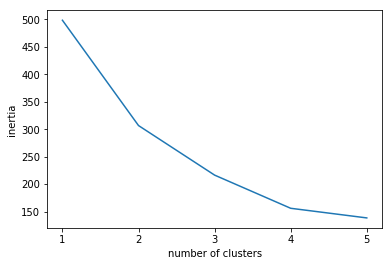

In [53]:
# Visualize elbow test results

# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

**`Figure 26`** - Elbow test for clustering in the customer value vision

__Step 3__: Create model with 3 clusters

Looking at our elbow test(**`Figure 25`**) for this model we could choose between 2 and 3 clusters. And after trying both parameters we saw better results for these variables using the 3 clusters.

In [54]:
# Calculate k-means for specific cluster number

model = KMeans(n_clusters=3)
model.fit(cust_Value_scld)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 3.2.3. Exploring the model

__Step 1:__ Check and analyze data with non scaled data for better intuition

In [55]:
cust_Value['label']= model.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
descr = cust_Value.groupby(['label']).describe().transpose()
display(descr)

label                                0              1             2
Income            count     715.000000     892.000000    746.000000
                  mean    48445.209790   87369.119955  45509.931635
                  std     18048.088153   12972.870743  17096.843768
                  min      2785.000000   52924.000000   3780.000000
                  25%     35210.500000   78055.750000  33542.000000
                  50%     48654.000000   87693.000000  45017.500000
                  75%     61925.000000   96067.250000  57507.500000
                  max    102205.000000  126566.000000  90849.000000
Recency           count     715.000000     892.000000    746.000000
                  mean       77.202797      46.721973     24.979893
                  std        14.074412      27.040790     15.076659
                  min        49.000000       0.000000      0.000000
                  25%        65.000000      25.000000     12.000000
                  50%        78.000000      46.000000     24.500000
                  75%        90.000000      68.000000     38.000000
                  max        99.000000      99.000000     53.000000
totalMntSpent     count     715.000000     892.000000    746.000000
                  mean      303.200000    1533.751121    216.978552
                  std       319.739745     523.497161    225.340171
                  min         4.000000     462.000000      9.000000
                  25%        70.500000    1128.500000     59.000000
                  50%       155.000000    1477.500000    110.000000
                  75%       461.500000    1875.000000    342.000000
                  max      1577.000000    3359.000000   1359.000000
numberOfPurchases count     715.000000     892.000000    746.000000
                  mean       18.405594      29.017937     16.868633
                  std         6.229547       4.570401      5.245276
                  min         0.000000      17.000000      1.000000
                  25%        14.000000      26.000000     13.000000
                  50%        17.000000      29.000000     16.000000
                  75%        23.000000      32.000000     21.000000
                  max        43.000000      44.000000     35.000000
share_Deals       count     715.000000     892.000000    746.000000
                  mean        0.141047       0.067663      0.133817
                  std         0.094543       0.056130      0.071456
                  min         0.000000       0.000000      0.000000
                  25%         0.083333       0.034483      0.083333
                  50%         0.133333       0.041667      0.130435
                  75%         0.187500       0.086957      0.176471
                  max         1.000000       0.361111      0.937500

**`Figure 27`** - Description of variables by clusters in the customer value vision

In [57]:
descr_mean = cust_Value.groupby(['label']).mean()
display(descr_mean.transpose())

# Check mean AOV of clusters
AOV = (descr_mean['totalMntSpent']/descr_mean['numberOfPurchases'])
display(AOV)

label                         0             1             2
Income             48445.209790  87369.119955  45509.931635
Recency               77.202797     46.721973     24.979893
totalMntSpent        303.200000   1533.751121    216.978552
numberOfPurchases     18.405594     29.017937     16.868633
share_Deals            0.141047      0.067663      0.133817

label
0    16.473252
1    52.855277
2    12.862842
dtype: float64

Aqui recalculammos o AOV e reparamos que não são muito diferentes. Foi feito antes e depois do mmodelo

Aqui temos o resumo, comm as mean

**`Figure 28`** - Description of AOV(average order value) by clusters in the customer value vision

__Step 2:__ Create Visualizations for better understanding of clusters

In [58]:
# Visualize model

cust_Value_c0 = cust_Value[cust_Value.label==0]
cust_Value_c1 = cust_Value[cust_Value.label==1]
cust_Value_c2 = cust_Value[cust_Value.label==2]

Text(0.5, 1.0, 'Analyze clusters by income variable')

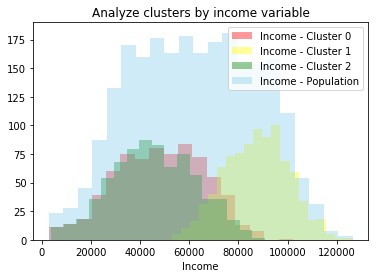

In [59]:
# Analyse variable income

sns.distplot(cust_Value_c0['Income'],color='red',label='Income - Cluster 0', kde = False)
sns.distplot(cust_Value_c1['Income'],color='yellow',label='Income - Cluster 1', kde = False)
sns.distplot(cust_Value_c2['Income'],color='green',label='Income - Cluster 2', kde = False)
sns.distplot(cust_Value['Income'],color='skyblue',label='Income - Population', kde = False)
plt.legend()
plt.title('Analyze clusters by income variable')

**`Figure 29`** - Visualization of Income distributions by cluster

In [60]:
centroids = model.cluster_centers_
centroids

array([[0.36887899, 0.77982623, 0.08918033, 0.41830896, 0.14104694],
       [0.68333686, 0.47193912, 0.45596159, 0.65949857, 0.06766278],
       [0.34516551, 0.25232215, 0.06348094, 0.38337802, 0.13381733]])

In [61]:
cust_Value.columns

Index(['Income', 'Recency', 'totalMntSpent', 'numberOfPurchases',
       'share_Deals', 'label'],
      dtype='object')

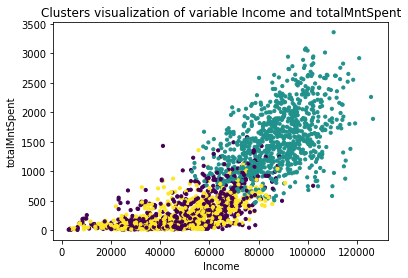

In [62]:
# Visualize Income and totalMntSpent
var_x='Income'
var_y='totalMntSpent'

id_x=cust_Value.columns.get_loc(var_x)
id_y=cust_Value.columns.get_loc(var_y)

plt.scatter(cust_Value[var_x], cust_Value[var_y], c=cust_Value.label, s=10)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title('Clusters visualization of variable '+var_x+' and '+var_y)
plt.show()

**`Figure 30`** - Visualization of variable totalMntSpent by Income by clusters

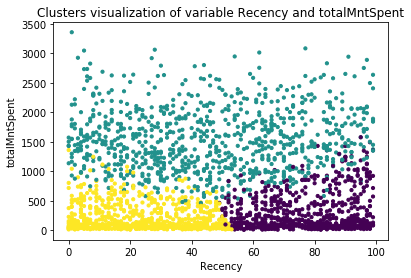

In [63]:
# Visualize 
var_x='Recency'
var_y='totalMntSpent'

id_x=cust_Value.columns.get_loc(var_x)
id_y=cust_Value.columns.get_loc(var_y)

plt.scatter(cust_Value[var_x], cust_Value[var_y], c=cust_Value.label, s=10)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title('Clusters visualization of variable '+var_x+' and '+var_y)
plt.show()

**`Figure 31`** - Visualization of variable totalMntSpent by Recency by clusters

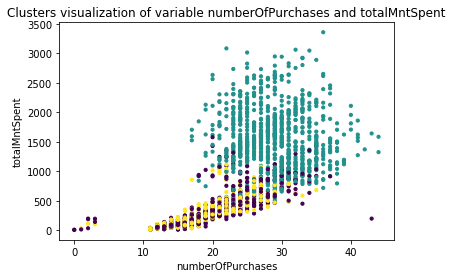

In [64]:
# Visualize 
var_x='numberOfPurchases'
var_y='totalMntSpent'

id_x=cust_Value.columns.get_loc(var_x)
id_y=cust_Value.columns.get_loc(var_y)

plt.scatter(cust_Value[var_x], cust_Value[var_y], c=cust_Value.label, s=10)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title('Clusters visualization of variable '+var_x+' and '+var_y)
plt.show()

**`Figure 32`** - Visualization of variable totalMntSpent by numberOfPurchases by clusters

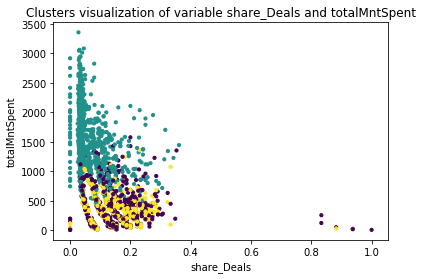

In [65]:
# Visualize 
var_x='share_Deals'
var_y='totalMntSpent'

id_x=cust_Value.columns.get_loc(var_x)
id_y=cust_Value.columns.get_loc(var_y)

plt.scatter(cust_Value[var_x], cust_Value[var_y], c=cust_Value.label, s=10)
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title('Clusters visualization of variable '+var_x+' and '+var_y)
plt.show()

**`Figure 33`** - Visualization of variable totalMntSpent by share_Deals by clusters

#### 3.2.4. Cluster Profiling

The clients that belong to cluster 0 and 1 earn (variable income) approximately the same and the clients from cluster 2 earn significantly higher, see **`Figure 27 and 28`**.<br> The clients from cluster 2, who earn more, also spend more in purchases and buy much more than the clients from other clusters, with a superior average order value(AOV), see **`Figure 27, 28 and 29`**. Also when we look at mean values there seems to be a slight difference in terms of spending amount and AOV between clusters 0 and 1 see **`Figure 27 and 28`**, however when we look at the distribution of values,**`Figure 29, 30 and 31`**, we see that these two clusters are very intertwined. <br> In terms of how long the clients have been without buying (variable recency), we see that clients from cluster 0 have been a long time without buying anything followed by clients from cluster 2, which are the two highest-spending clusters. However, there is more spread in terms of recency in cluster 2 , meaning that as a cluster they are not following a specific pattern in terms of recency, see **`Figure 27 and 28`**.
Finally, we see in **`Figure 33`** that a significant portion of clients from cluster 2 tend to make fewer purchases using deals and promotions comparatively to clients from clusters 0 and 1.

## 5. Conclusions

Our goal in this first project was to identify actionable segments of clients from the Lagoste Stores internal database. Although Lagoste company has had good net earnings through the years, a pattern of decline is forming and profit growth perspectives for the next two years are not encouraging. So the challenge presents itself as to how do we define strategies to invert this situation.

Before developing a model application to our segmentation problem, we conduct some data exploration and visualization as well as several pre-processing steps such as data cleaning and transformations. We detail all actions we have made in dealing with missing values and outliers.

After pre-processing the data, we took a look at the Lagoste Stores customer base and defined their consumer behaviours, throughout the **k-means** technique and applied the model results to profile these segments of clients. Two dimensions were explored: customer value and product usage.

Results from the **product usage** vision indicate there is a distinct segmentation between 3 main categories of products: sneakers, rackets and premium products. All remain products (TShirts, Hats and Watches) appear to be consumed homogeneously. According to our results, cluster 0 clients spend an essential proportion on rackets, a middle proportion on sneakers, and almost nothing on the remaining products. In contrast, cluster 1 clients spend an important portion on sneakers, an intermediate proportion on rackets and nearly nothing on the remaining products, see **`Figures 14 and 15-17`**. Finally, clients from cluster 2 are more likely to smooth their consumption through the different products, spending the most on Premium products, see **`Figures 14 and 15-17`**.

Results from the **customer value** vision showed that clients who earn more are more willing to spend and buy with more frequency, having a higher average order value as to be theoretically expected, see **`Figure 27 and 28`**. However, we see an interesting pattern in how long ago do these clients have made any purchases. There is a particular segment that has stopped purchasing, which could be a potential bottleneck since it represents a segment to intervene and stimulate buying through marketing strategies.

Apart from these two visions, we also explored three small consumer groups that seemed to distinguish themselves from the rest of the sample, represented mostly by **outliers** of income and total amount spent, see **`Figures 5 - 7`**. We have identified three different groups of outliers, i.e. records that do not behave according to predefined economic theory:

    1) High Income and High Spending (top right)
    2) High Income and Low Spendings (bottom right)
    3) Low Income and High Spendings (top left)

Group 1) and 2) earned disproportionately higher than the rest of the database. These clients belong to our pre-identified Income outliers. All Group 1) clients spend the most on Rackets (at least 95% of their spendings) and make their purchases through deals and catalogue, rather than web or physical stores. In contrast, Group 2) is characterized by customers who, despite having a high income, do not spend (most) on any of Lagoste products, and can be made of customers with less propensity to consume, as they tend do spread out their expenditures through all products. Finally, Group 3 is made of clients who despite earning very little, spent very high amounts. All Group 3 clients spend the most on Rackets (at least 95% of their spendings) and make their purchases through deals. This cluster can also be made of professional athletes or some related segment, as well as non-professional players that rely on loans to buy expensive sports equipment, see **`Figures 5 - 7`**.

A olho fizemos logo 3 grupos com o scater plot. Com o enxame, usamos duas vizoes e aplicamos o k-meanes